# Introduction to Machine Learning
# Part I: Regression

In this notebook, we'll walk through the process of how to make a supervised learning model for a regression problem.  We'll be working with wine quality data from the UCI Machine Learning library.  The task at hand is to __predict wine quality using chemical properties.__  

Source: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

## Overview:

Generally, a supervised machine learning workflow will consist of the following elements:
1. Data Cleaning and Exploration
2. Data Preparation
3. Model Selection
4. Train and Validate Model (training data)
5. Test and Make Predictions (test data)

## Preliminaries

Before we get started, let's go ahead and import Pandas, NumPy, Matplotlib, and Seaborn.  We'll also set the default plotting style to make our figures look a bit nicer.  Specific Sklearn API's will be imported as needed along the way.

In [2]:
# Bring in necessary imports.  We'll refer to sklearn specifics along the way.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Set default plotting style
import seaborn as sns
sns.set_style('darkgrid')

## 1. Data Cleaning and Exploration
To begin, import the data using the Pandas `pd.read_csv()` function and specify the delimiter as `;`.  Name the dataframe 'df' for simplicity.  We can also get a preview of the data by calling `df.head()`.

In [3]:
# Import data.
df = pd.read_csv('winequality-red.csv', delimiter=';')

# Take a look at the first 5 entries using df.head()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Right away we see that the data is all numeric, meaning we won't have to worry about any categorical encoding.  However, the data is on very different scales so we're going to want to do some standardization before modeling.  This will be handled in the next section on Data Preparation.

Next, look for missing values and check data types.  This can be done using `df.info()`.

In [4]:
# Get basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This data is nicely packaged up with no missing values and does not require cleaning.  This won't be the case with real world data.

Let's start our exploration with simple summary statistics.  This is a good spot to check for data errors and extreme outliers.  Sometimes missing data is in the form of a `0` entry and not `null` so it wouldn't be caught using `df.info` above.

Summary statistics can be easily computed on your dataframe using `df.describe`.  This will generate statistics for numeric variables.  If your data set contains categorical variables, you can get summary statistics of those features by using `df.describe(include=['Object'])`.

In [5]:
# Get summary statistics for numeric values
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Next, we want to look at the distributions of the data.  Histograms can be quickly generated for each column using `df.hist()`.

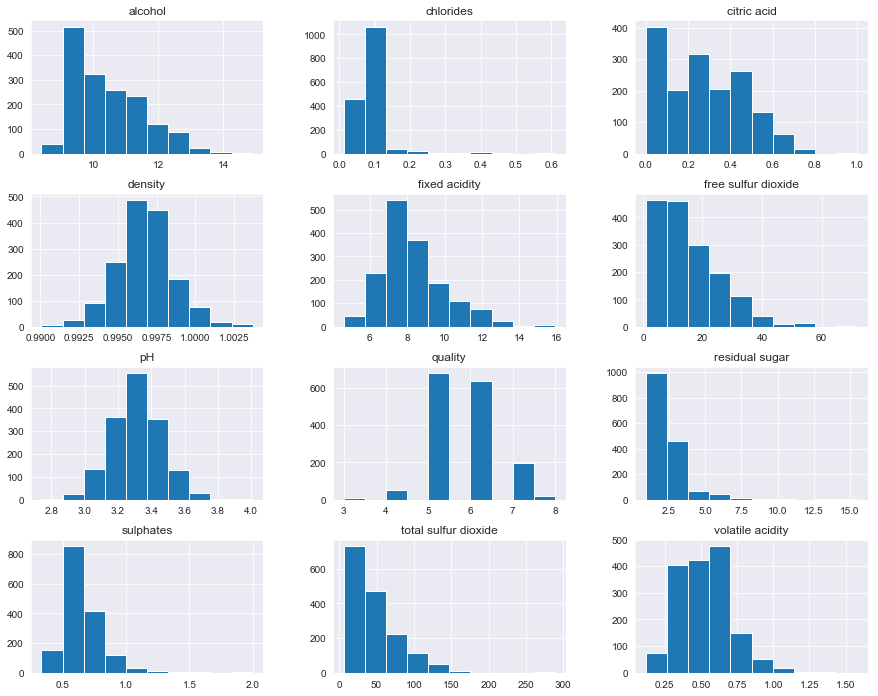

In [6]:
# Generate histograms
df.hist(figsize=(15,12))
plt.show()

Next we will look at correlations between the variables, including the target variable `quality`.

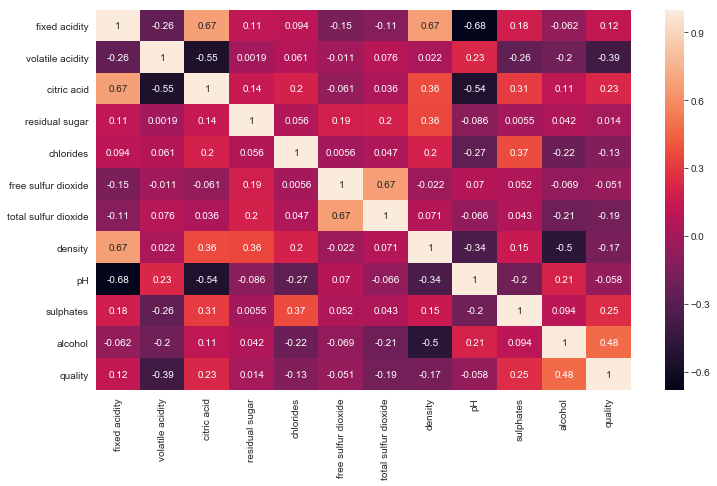

In [7]:
# Calculate pairwise correlations
corr = df.corr()

# Plot as a heatmap
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True)
plt.show()

Overall, there aren't too many strong correlations between variables.  This is good because multicollinearity can be problematic for certain models, particularly linear regression.  There are a couple instances where correlations are fairly large (i.e. pH:fixed acidity, density:fixed acidity, citric acid:fixed acidity), but we'll leave them as-is for now.  The diagonals can be ignored because it's just the correlation of a variable with itself.

## 2. Data Preparation

We're now ready to prepare the data for modeling.  For this, we'll separate out our variables from the target `quality`.  It's convention to label the variables as `X` and the target as `y`.  You may also see variables referred to as features or model inputs.  I'll refer to them as features from here forward.

In [8]:
# Specify features 
X = df.drop(['quality'], axis=1)

# Specify target
y = df['quality']

Let's take a look at what our subset data frames look like:

In [9]:
# Features.  Notice the quality column has been removed.
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
# Target.  Only the quality column.
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

The next step is to split the data into training and testing sets.  This is an essential step to prevent overfitting.  The training data should be used to test different algorithms and tune hyperparameters.  Once the best performing algorithm is identified, the test data should be used to evaluate how well it will perform on unseen data (i.e. an indicator of how generalizable it will be).  

In [11]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Specify how the data should be split. Reserve 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Let's take a look at some of the splits:

In [12]:
# Training features data frame
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
925,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
906,7.2,0.54,0.27,2.6,0.084,12.0,78.0,0.99640,3.39,0.71,11.0
426,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4
1251,7.5,0.58,0.14,2.2,0.077,27.0,60.0,0.99630,3.28,0.59,9.8


In [13]:
# Training shapes
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (1119, 11)
X_test: (480, 11)


Recall from above, the features were all numeric but on very different scales.  It's generally a good idea to scale features to a consistent range before modeling.  This can be done through either normalization or standardization.  Here, we'll use standardization, which brings the mean to `0` and standard deviation to `1` for each feature.

Normalization and standardization are done after splitting the data into training and testing sets.  This ensures no information leakage to the test set. 

In [14]:
# Import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Create instance 
scaler = StandardScaler()

In [15]:
# Use instance to fit and transform train and test features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Take a look at scaled data
X_train_scaled

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

## 3. Model Selection

Now it's time to select models.  While it's standard practice to evaluate the performance of several models, I'll only be demonstrating one here for the sake of brevity.  We'll implement a Random Forest Regression model, which is an ensemble method that combines several decision trees.  Random Forests tend to perform well, are easy to implement, and give us insight about feature importances.

In [16]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create model instance
rf = RandomForestRegressor()

## 4. Train and Validate Model (training data only)

Now that we have our model, let's go ahead and fit it using the training data. 

We'll also be introducing the idea of k-fold cross validation.  Cross validation is used to make a model more robust by testing the model on subsets of training data.  This is a good illustration of how k-fold cross validation works: https://en.wikipedia.org/wiki/Cross-validation_(statistics)#/media/File:K-fold_cross_validation_EN.jpg

Let's get to it.

In [17]:
# Import cross validation
from sklearn.model_selection import cross_val_score

# Fit using all training data
rf.fit(X_train_scaled, y_train)

# Evaluate performance using cross validation with k=3 folds
cross_val_score(rf, X_train_scaled, y_train, cv=3)

array([0.3205928 , 0.34309552, 0.3216727 ])

You can see that the model performance varies somewhat across each k-fold. The values being reported are coefficients of determination, or R^2 values. 

If you're feeling brave, go ahead and try out changing some of the hyperparameters to see if you can improve the model accuracy.  Hyperparameters are set inside `RandomForestRegressor()`.  To learn more about options available to you, check out the model documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

__Feature Importance__

A useful feature of Random Forests is the ability to extract out feature importances.  Let's take a look at what that looks like.

In [18]:
# Create helper function to extract and plot feature importance
def feature_importance(columns, feature_importances):
    features = dict(zip(columns, feature_importances))
    importance = pd.DataFrame.from_dict(features, orient='index').rename(columns={0:'importance'}).sort_values(by='importance')
    importance.plot(kind='barh', figsize=(10,8))

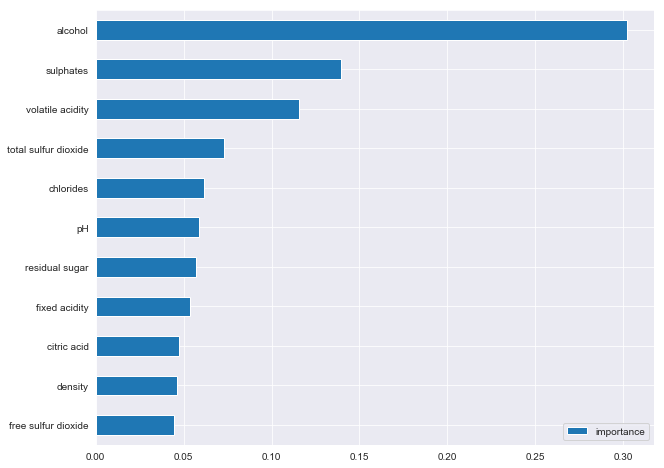

In [19]:
# Get feature importances.  Refer to original data frame for column names.
feature_importance(df.columns, rf.feature_importances_)

`Alcohol`is the most important feature used by the model to predict `quality`, followed by `sulphates` and `volatile acidity`.  The other features have lower significance.

## 5. Test and Make Predictions (test data)

Ok, once you've gotten to this point, you've theoretically tested several models and determined which one performs best on your training data set using cross validation.  Now it's time to see how the model performs on unseen data.  This is the ultimate test and will help you understand how your model will generalize to new data. 

In [20]:
# Get score using test data 
rf.score(X_test_scaled, y_test)

0.38836383053005574

The model is about 38% accurate on test data.  While this isn't exactly a phenomenal model, it is performing similarly to what we were seeing above with the training data.  This indicates the model is not overfitting, which is a good thing.  

And finally, we can use the model to generate `quality` predictions.  Let's make some predictions and compare them to the actual values.

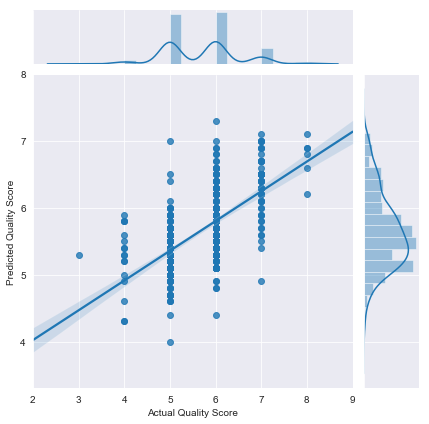

In [21]:
# Make predictions
y_pred = rf.predict(X_test_scaled)

# Plot against actual 
sns.jointplot(y_test, y_pred, kind='reg')
plt.xlabel('Actual Quality Score')
plt.ylabel('Predicted Quality Score')
plt.show()

When we plot the results, something interesting stands out.  Maybe you caught it earlier on in the initial data exploration.  

__Pop Quiz - Why is this not the greatest problem for a regression model after all?__

Answer: The target variable is actually a discrete outcome.  We have 6 classes of potential outcomes (3 through 8), making it more conducive to a multiclass classification problem.  

What happens if we round our predictions to the nearest integer?

In [22]:
# Take predictions and round to whole value
rounded_pred = np.round(y_pred, 0)

# Import accuracy score from sklearn.  
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rounded_pred)

0.5979166666666667

Well would you look at that!  The model accuracy improves substantially.  If you want to improve the performance of the model, check out some of the multiclass classification algorithms available in sklearn: http://scikit-learn.org/stable/modules/multiclass.html

## Wrap Up:

In this notebook, we walked through a basic supervised learning regression task.  Up next, we'll turn this into a binary classification problem.